### Τεχνολογίες Κινητού Υπολογισμού 
με Μηχανική Μάθηση
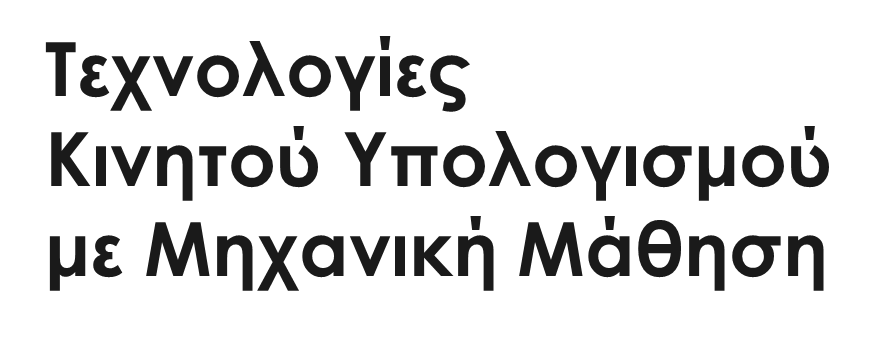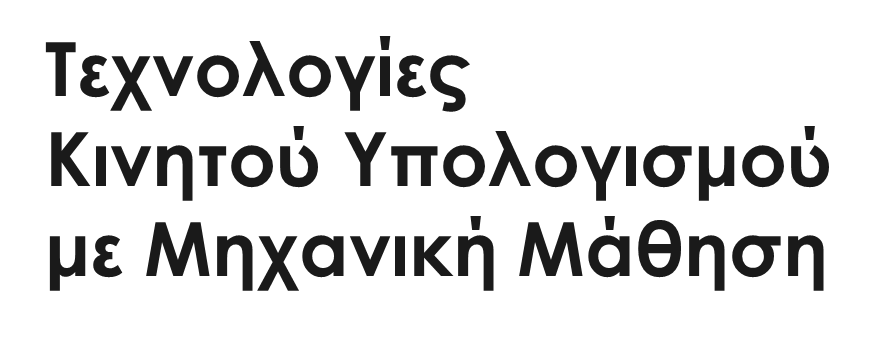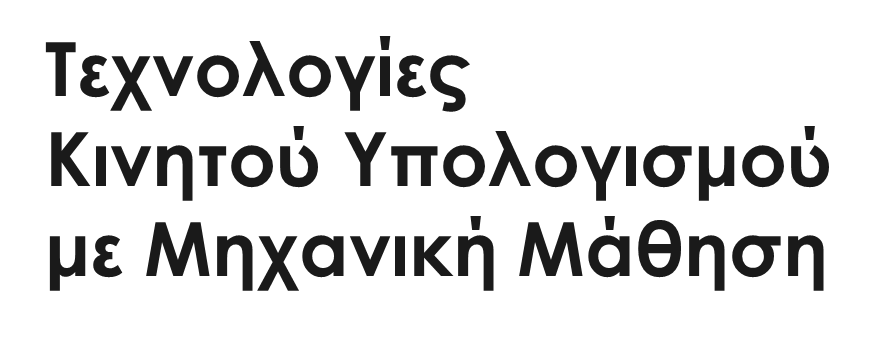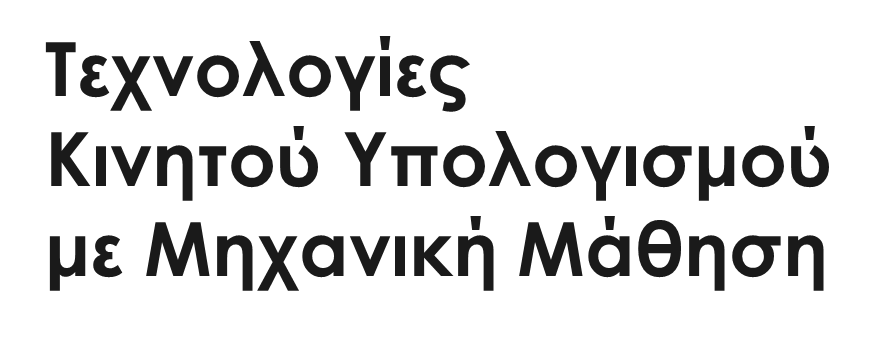
#### 1η Εργαστηριακή Άσκηση 

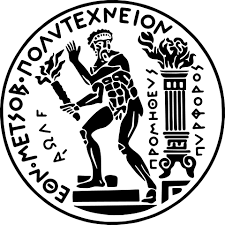

Σχολή Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών

Εργαστήρι Ευφυών Επικοινωνιών και Δικτύων Ευρείας Ζώνης

Εθνικό Μετσόβιο Πολυτεχνείο

9ο εξάμηνο

Ακ. Έτος 2024-2025



 `⚠️  Παρακαλείστε να μην δημοσιεύσετε τις απαντήσεις και υλοποιήσεις των εργαστηριακών ασκήσεων στο διαδίκτυο. Ο λόγος είναι η πιθανή επανάληψη των συγκεκριμένων ασκήσεων σε επόμενα ακαδημαικά έτη.`

 `⚠️  Τα χαρακτηριστικά του συνόλου δεδομένων που σας δόθηκαν μπορούν φυσικά να τροποποιηθούν με χρήση στατιστικών μεθόφων ή ακόμα και να παραλειφθούν. Ωστόσο, σε καμία περίπτωση, το σύνολο δεδομένων δεν πρέπει να εμπλουτισθεί με επιπλέον εγγραφές. Πιθανές τέτοιες ενέργειες θα κοστίσουν στην τελική βαθμολόγηση της εργασίας σας.`

Ονοματεπώνυμο φοιτητή: Σπανάκης Παναγιώτης, Ιωακείμ Ελ-Χαττάμπ-Μπριστογιάννης 

Α.Μ.: 03400274, 03400249

### 1. Εισαγωγή συνόλου δεδομένων

Η κάθε ομάδα μπορεί να κατεβάσει το προσωποποιημένο σύνολο δεδομένων για το training-(validation)-test από [εδώ](https://drive.google.com/drive/folders/1lO6elfOldaqSw7k-UWvZBZTWKdmisp5b?usp=sharing).



1.α. Φορτώστε το σύνολο δεδομένων στο notebook σας.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [14]:
df = pd.read_csv('dataset_new(in).csv')

1.β. Τυπώστε τις πρώτες 5 ή 10 γραμμές του dataset για να δείτε ότι έχει φορτωθεί όπως πρέπει

In [15]:
df.head()

,X,Y,base_station_user,sector_of_BS_user,sector_user,ModulationType,Power_W_,BS_UEDistance_km_,BS_UEAngle_degrees_,Throughput_Mbps_
0,-1538.494704,1229.952836,10,1,28,QPSK,0.176421,2.175760,195.063406,379.315339
1,-1392.160776,1583.572523,9,1,25,16-QAM,0.053331,1.968813,326.605415,299.266046
2,34.900399,-1440.542036,1,1,1,QPSK,0.000312,0.049357,347.032825,1161.318447
3,-1482.404758,1613.021019,9,1,25,16-QAM,0.125557,2.096437,152.344674,814.071594
4,1451.921185,521.828373,12,2,35,64-QAM,0.017777,2.053327,314.814695,1192.715985


In [16]:
df.columns

Index(['X', 'Y', 'base_station_user', 'sector_of_BS_user', 'sector_user',
       'ModulationType', 'Power_W_', 'BS_UEDistance_km_',
       'BS_UEAngle_degrees_', 'Throughput_Mbps_'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    10075 non-null  float64
 1   Y                    10075 non-null  float64
 2   base_station_user    10075 non-null  int64  
 3   sector_of_BS_user    10075 non-null  int64  
 4   sector_user          10075 non-null  int64  
 5   ModulationType       10075 non-null  object 
 6   Power_W_             10075 non-null  float64
 7   BS_UEDistance_km_    10075 non-null  float64
 8   BS_UEAngle_degrees_  10075 non-null  float64
 9   Throughput_Mbps_     10075 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 787.2+ KB


### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA) 
Με βάση το notebook της παρουσίασης της 2ης εργαστηριακής άσκησης δημιουργήστε code cells με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων. Συνίσταται η χρήση text cells για επεξήγηση των αποτελεσμάτων της EDA. 

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων (είναι ισοροππημένο το σύνολο δεδομένων;),

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών, 

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [18]:
df = pd.read_csv('dataset_new(in).csv')

In [19]:
df.shape

(10075, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    10075 non-null  float64
 1   Y                    10075 non-null  float64
 2   base_station_user    10075 non-null  int64  
 3   sector_of_BS_user    10075 non-null  int64  
 4   sector_user          10075 non-null  int64  
 5   ModulationType       10075 non-null  object 
 6   Power_W_             10075 non-null  float64
 7   BS_UEDistance_km_    10075 non-null  float64
 8   BS_UEAngle_degrees_  10075 non-null  float64
 9   Throughput_Mbps_     10075 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 787.2+ KB


In [21]:
df.columns

Index(['X', 'Y', 'base_station_user', 'sector_of_BS_user', 'sector_user',
       'ModulationType', 'Power_W_', 'BS_UEDistance_km_',
       'BS_UEAngle_degrees_', 'Throughput_Mbps_'],
      dtype='object')

In [22]:
# We need to create balanced categories for the Throughput_Mbps_ column
df['Throughput_Mbps_'].describe()

count    10075.000000
mean       813.887653
std        399.745375
min        117.021646
25%        473.088025
50%        811.654472
75%       1160.667322
max       1499.884142
Name: Throughput_Mbps_, dtype: float64

Ας δόυμε τη συσχέτιση μεταξύ των δεδομένων

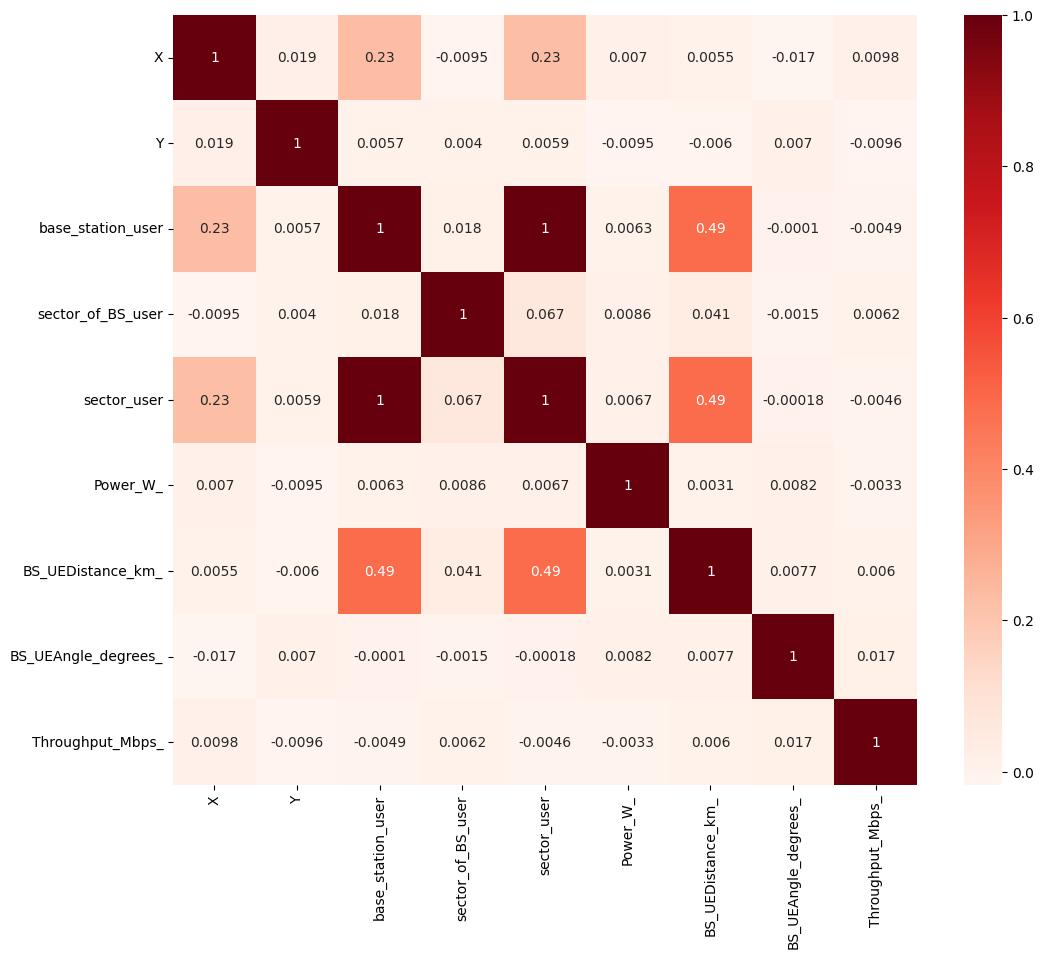

In [23]:
# Keep the non-categorical columns
df_numeric = df.select_dtypes(include=[np.number])
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
cor = df_numeric.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()



We can see that no variable is correlated with the target variable. 

We can see that `base_station_user` and `sector_user` are perfectly correlatred with each other, so we need to drop one of them.

In [24]:
# Drop the base_station_user column
df = df.drop(['base_station_user'], axis=1)

In [25]:
df.columns

Index(['X', 'Y', 'sector_of_BS_user', 'sector_user', 'ModulationType',
       'Power_W_', 'BS_UEDistance_km_', 'BS_UEAngle_degrees_',
       'Throughput_Mbps_'],
      dtype='object')

In [26]:
pseudo_categorical_columns = []
for column in df.columns:
    print(f"{column} : {df[column].nunique()}")
    if df[column].nunique() < 60:
        pseudo_categorical_columns.append(column)

X : 10075
Y : 10075
sector_of_BS_user : 3
sector_user : 57
ModulationType : 3
Power_W_ : 10075
BS_UEDistance_km_ : 10075
BS_UEAngle_degrees_ : 10075
Throughput_Mbps_ : 10075


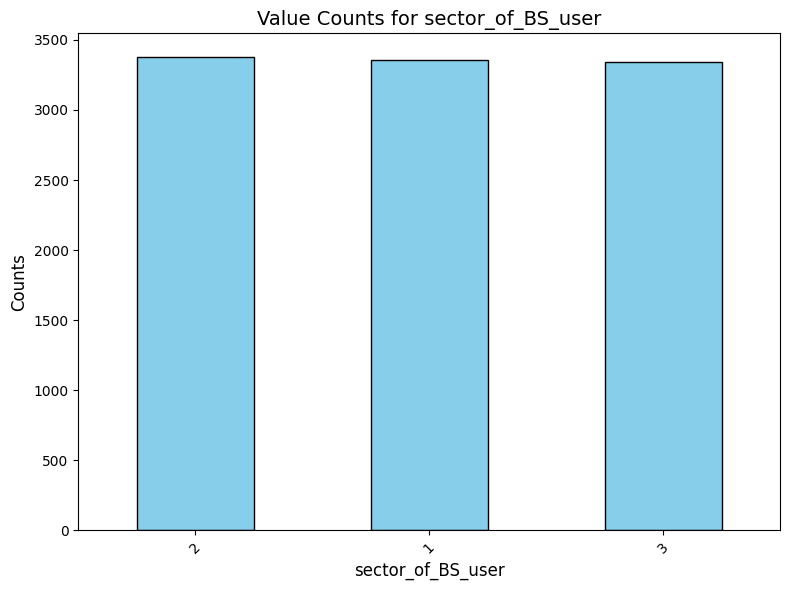

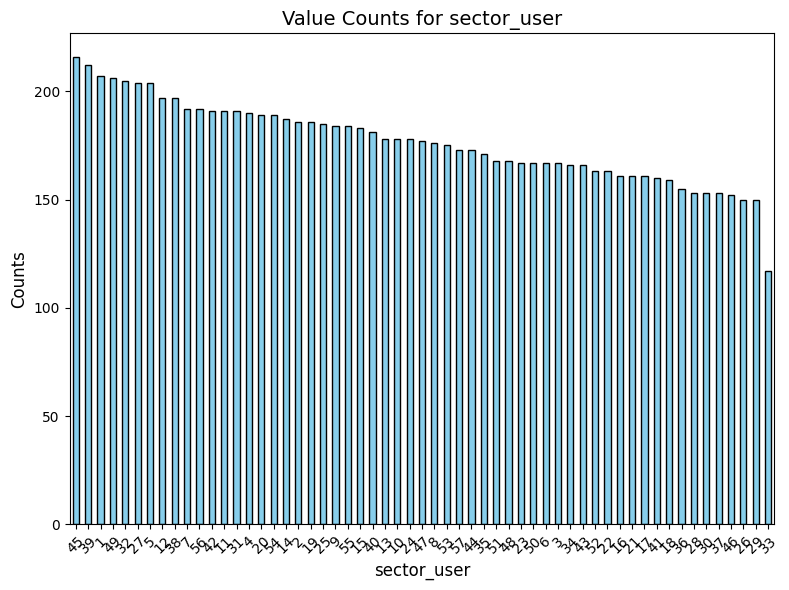

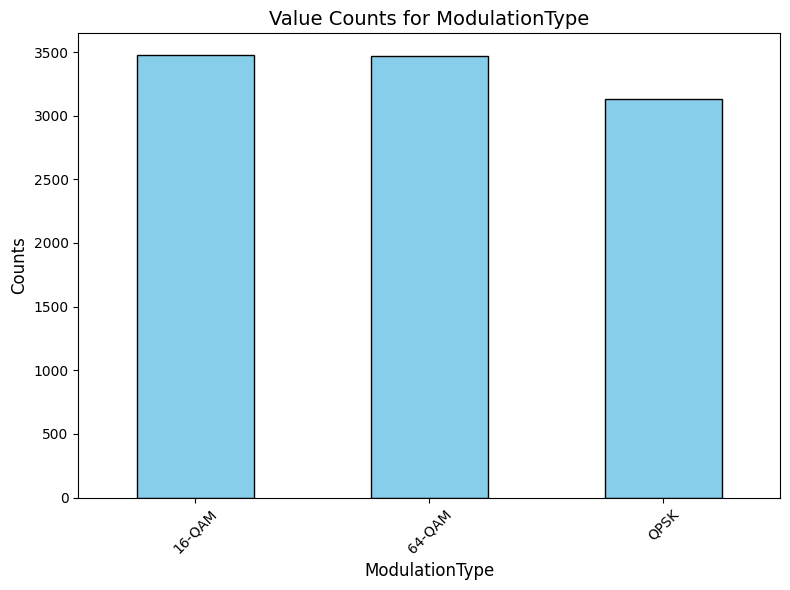

In [27]:
# Assuming df is your DataFrame
for column in pseudo_categorical_columns:
    plt.figure(figsize=(8, 6))  # Optional: Adjusts the size of each plot
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f'Value Counts for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Counts', fontsize=12)
    plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
    plt.tight_layout()       # Adjusts subplot params so that the subplot(s) fits in to the figure area.

    plt.show()

In [28]:
# Get the number of missing values for each column
df.isnull().sum()

X                      0
Y                      0
sector_of_BS_user      0
sector_user            0
ModulationType         0
Power_W_               0
BS_UEDistance_km_      0
BS_UEAngle_degrees_    0
Throughput_Mbps_       0
dtype: int64

In [29]:
from scipy.stats import normaltest, skew, kurtosis, probplot
from typing import List, Dict, Union

In [30]:
def test_normality(df: pd.DataFrame, 
                  alpha: float = 0.05, 
                  plot: bool = True) -> Dict[str, Dict[str, Union[float, bool]]]:
    """
    Test normality of numerical columns in a DataFrame using multiple methods.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input DataFrame containing the data
    alpha : float, optional (default=0.05)
        Significance level for statistical tests
    plot : bool, optional (default=True)
        Whether to create visualization plots
        
    Returns:
    --------
    Dict containing test results for each numerical column
    """
    # Select numerical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) == 0:
        raise ValueError("No numerical columns found in the DataFrame")
    
    results = {}
    
    # Set up the plotting area if plotting is enabled
    if plot:
        n_cols = len(numeric_cols)
        fig_height = 4 * n_cols
        fig, axes = plt.subplots(n_cols, 3, figsize=(15, fig_height))
        if n_cols == 1:
            axes = axes.reshape(1, -1)
            
    for idx, column in enumerate(numeric_cols):
        # Get column data
        data = df[column].dropna()
        
        # Skip if too few data points
        if len(data) < 3:
            results[column] = {
                "error": "Insufficient data points for normality test"
            }
            continue
            
        k2_stat, k2_p = normaltest(data)
        
        # Calculate descriptive statistics
        skewness = skew(data)
        kurtosis_ = kurtosis(data)
        
        # Store results
        results[column] = {
            "dagostino_k2_test": {
                "statistic": k2_stat,
                "p_value": k2_p,
                "is_normal": k2_p > alpha
            },
            "descriptive_stats": {
                "skewness": skewness,
                "kurtosis": kurtosis_,
                "mean": np.mean(data),
                "median": np.median(data),
                "std": np.std(data)
            }
        }
        
        if plot:
            # Histogram with KDE
            sns.histplot(data=data, kde=True, ax=axes[idx, 0])
            axes[idx, 0].set_title(f'{column} - Distribution')
            
            # Q-Q plot
            probplot(data, dist="norm", plot=axes[idx, 1])
            axes[idx, 1].set_title(f'{column} - Q-Q Plot')
            
            # Box plot
            sns.boxplot(data=data, ax=axes[idx, 2])
            axes[idx, 2].set_title(f'{column} - Box Plot')
    
    if plot:
        plt.tight_layout()
        plt.show()
        
    return results



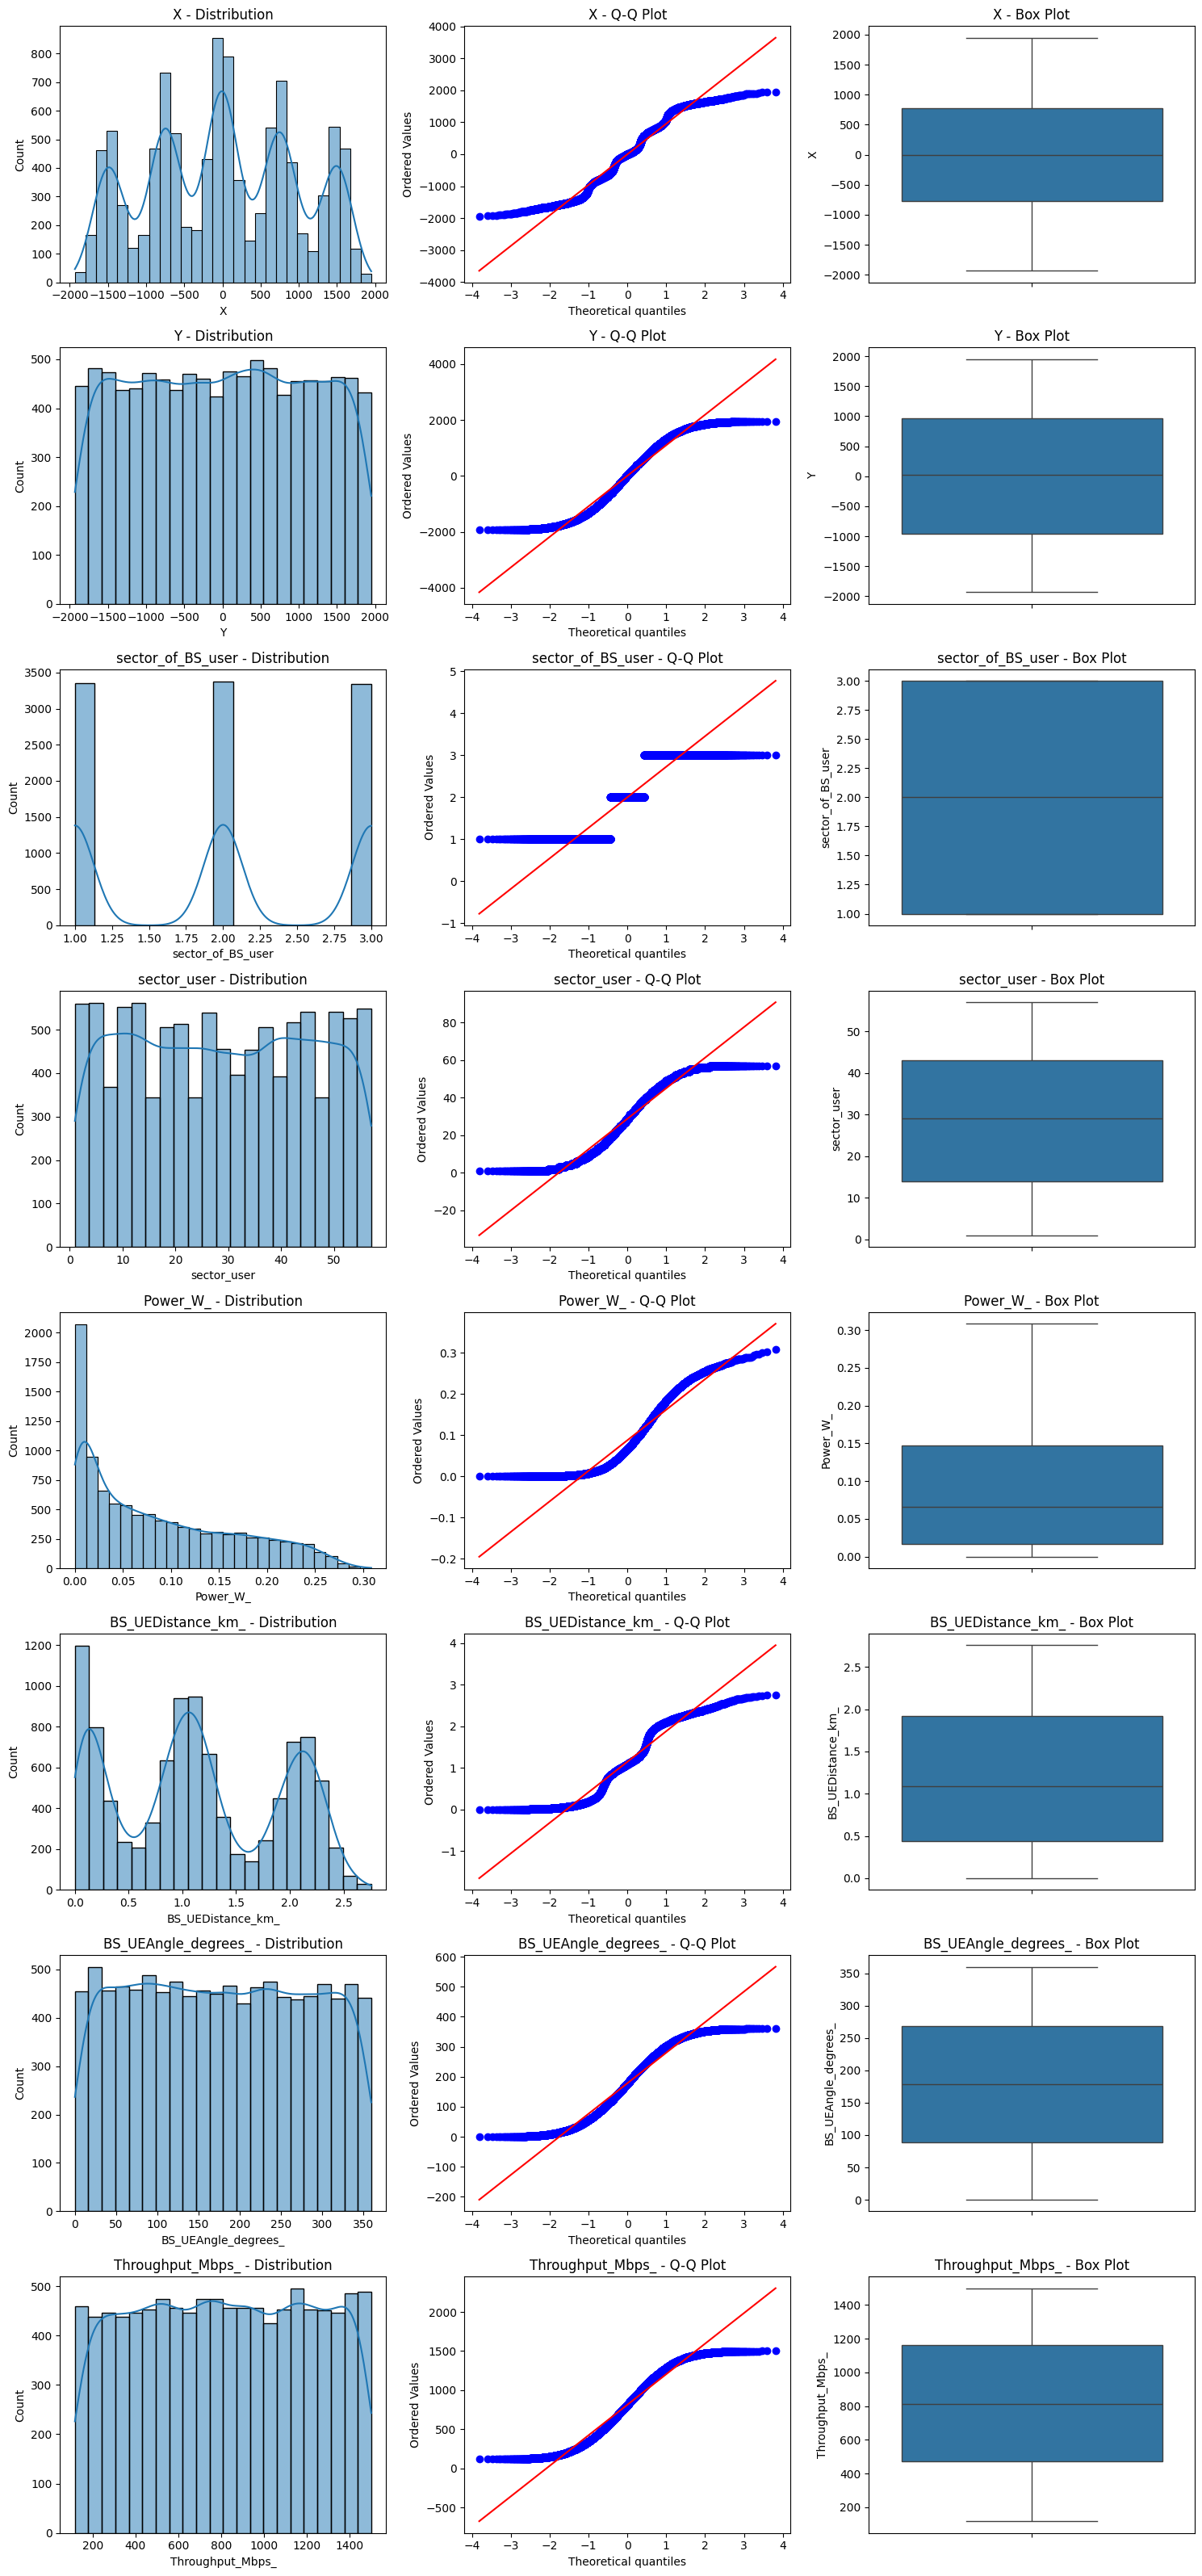


Column: X

Statistical Tests:
-----------------

D'Agostino K^2 Test:
Statistic: 2492.5094
P-value: 0.0000
Normal at α=0.05: No

Descriptive Statistics:
----------------------
Mean: -0.8735
Median: -4.3339
Standard Deviation: 973.1688
Skewness: 0.0077
Kurtosis: -1.0148

Column: Y

Statistical Tests:
-----------------

D'Agostino K^2 Test:
Statistic: 8451.0410
P-value: 0.0000
Normal at α=0.05: No

Descriptive Statistics:
----------------------
Mean: 5.1235
Median: 21.2383
Standard Deviation: 1118.0500
Skewness: -0.0056
Kurtosis: -1.1960

Column: sector_of_BS_user

Statistical Tests:
-----------------

D'Agostino K^2 Test:
Statistic: 62262.2543
P-value: 0.0000
Normal at α=0.05: No

Descriptive Statistics:
----------------------
Mean: 1.9987
Median: 2.0000
Standard Deviation: 0.8153
Skewness: 0.0024
Kurtosis: -1.4956

Column: sector_user

Statistical Tests:
-----------------

D'Agostino K^2 Test:
Statistic: 12361.0250
P-value: 0.0000
Normal at α=0.05: No

Descriptive Statistics:
--------

In [31]:
def print_normality_summary(results: Dict[str, Dict[str, Union[float, bool]]]) -> None:
    """
    Print a formatted summary of normality test results.
    
    Parameters:
    -----------
    results : Dict
        Results dictionary from test_normality function
    """
    for column, tests in results.items():
        print(f"\n{'='*50}")
        print(f"Column: {column}")
        print(f"{'='*50}")
        
        if "error" in tests:
            print(f"Error: {tests['error']}")
            continue
            
        # Print test results
        print("\nStatistical Tests:")
        print("-----------------")
        tests_info = {
            "dagostino_k2_test": "D'Agostino K^2",
        }
        
        for test_key, test_name in tests_info.items():
            test = tests[test_key]
            print(f"\n{test_name} Test:")
            print(f"Statistic: {test['statistic']:.4f}")
            print(f"P-value: {test['p_value']:.4f}")
            print(f"Normal at α=0.05: {'Yes' if test['is_normal'] else 'No'}")
        
        # Print descriptive statistics
        print("\nDescriptive Statistics:")
        print("----------------------")
        stats = tests["descriptive_stats"]
        print(f"Mean: {stats['mean']:.4f}")
        print(f"Median: {stats['median']:.4f}")
        print(f"Standard Deviation: {stats['std']:.4f}")
        print(f"Skewness: {stats['skewness']:.4f}")
        print(f"Kurtosis: {stats['kurtosis']:.4f}")

# Run tests
results = test_normality(df)

# Print summary
print_normality_summary(results)

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Επεξεργαστείτε τα χαρακτηριστικά του συνόλου δεδομένων σας. Αν θεωρείτε ότι κάποια χαρακτηριστικά θα πρέπει να μετασχηματιστούν κάντε το χρησιμοποιώντας τους OneHotEncoder και LabelEncoder (αριθμητικά και κατηγορικά δεδομένα).`




In [32]:
pseudo_categorical_columns

['sector_of_BS_user', 'sector_user', 'ModulationType']

In [33]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Label Encode columns 'sector_of_BS_user', 'sector_user'
le = LabelEncoder()
df['sector_of_BS_user'] = le.fit_transform(df['sector_of_BS_user'])
df['sector_user'] = le.fit_transform(df['sector_user'])

In [34]:
# OneHot encode the categorical columns
df['ModulationType'].value_counts()

ModulationType
16-QAM    3473
64-QAM    3470
QPSK      3132
Name: count, dtype: int64

3.α.  Το σύνολο δεδομένων σας περιέχει Null values; Αν όχι αποδείξτε το με κατάλληλη εντολή. Αν ναι θα αντικαταστήσετε αυτές τις τιμές ή θα τις παραλείψετε απλώς. (Εξηγήστε)

In [35]:
# Get the number of missing values for each column
df.isnull().sum()

X                      0
Y                      0
sector_of_BS_user      0
sector_user            0
ModulationType         0
Power_W_               0
BS_UEDistance_km_      0
BS_UEAngle_degrees_    0
Throughput_Mbps_       0
dtype: int64

In [36]:
df.shape

(10075, 9)

3.β.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ML models ή κάνετε κάποια επιλογή;  Εξηγήστε. 


Πριν καταλήξουμε στο ποία χαρακτηριστικά θα χρησιμοποιήσουμε για την εκπαίδευση των μοντέλων μας, ας 
πραγματοποιήσουμε και ένα βασικό feature engineering.

In [37]:
df['Distance_From_Origin'] = np.sqrt(df['X']**2 + df['Y']**2)
df['Power_Distance_Ratio'] = df['Power_W_'] / (df['BS_UEDistance_km_'] + 1e-5)
df['BS_UEAngle_sin'] = np.sin(np.radians(df['BS_UEAngle_degrees_']))
df['BS_UEAngle_cos'] = np.cos(np.radians(df['BS_UEAngle_degrees_']))
df.drop('BS_UEAngle_degrees_', axis=1, inplace=True)
df['Power_Distance_Interaction'] = df['Power_W_'] * df['BS_UEDistance_km_']
df['ModulationType'] = df['ModulationType'].map({'QPSK': 0, '16-QAM': 1, '64-QAM': 2})
df['Modulation_Power_Interaction'] = df['ModulationType'] * df['Power_W_']

We can see that `base_station_user` and `sector_user` are perfectly correlatred with each other, so we need to drop one of them.

In [38]:
if 'base_station' in df.columns:
    df.drop('base_station', axis=1, inplace=True)

3.γ. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [39]:
# Get the number of missing values for each column
df.isna().sum()

X                               0
Y                               0
sector_of_BS_user               0
sector_user                     0
ModulationType                  0
Power_W_                        0
BS_UEDistance_km_               0
Throughput_Mbps_                0
Distance_From_Origin            0
Power_Distance_Ratio            0
BS_UEAngle_sin                  0
BS_UEAngle_cos                  0
Power_Distance_Interaction      0
Modulation_Power_Interaction    0
dtype: int64

In [40]:
def remove_correlated_features(X, threshold=0.5):
    """
    Αφαιρεί τα υψηλά συσχετισμένα χαρακτηριστικά από το σύνολο δεδομένων.
    
    Parameters:
    -----------
    X : DataFrame
        DataFrame με τα αρχικά και τα μηχανικά χαρακτηριστικά
    threshold : float, default=0.6
        Όριο συσχέτισης πάνω από το οποίο αφαιρούνται τα χαρακτηριστικά
        
    Returns:
    --------
    X_filtered : DataFrame
        DataFrame με τα επιλεγμένα χαρακτηριστικά
    removed_features : dict
        Λεξικό με τα αφαιρεμένα χαρακτηριστικά και τις συσχετίσεις τους
    """
    # Υπολογισμός πίνακα συσχέτισης
    corr_matrix = X.corr().abs()
    
    # Δημιουργία άνω τριγωνικού πίνακα
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Εύρεση χαρακτηριστικών με συσχέτιση πάνω από το όριο
    removed_features = {}
    to_drop = []
    
    for column in upper.columns:            
        high_corr = upper[column][upper[column] > threshold]
        if not high_corr.empty:
            for index in high_corr.index:
                if index not in to_drop:
                    removed_features[index] = {
                        'correlated_with': column,
                        'correlation': high_corr[index]
                    }
                    to_drop.append(index)
    
    X_filtered = X.drop(columns=to_drop)
    
    return X_filtered, removed_features

# Remove correlated features
df_filtered, removed_features = remove_correlated_features(df.drop('Throughput_Mbps_', axis=1))
df_filtered['Throughput_Mbps_'] = df['Throughput_Mbps_']

3.δ. Επιτελέστε κλιμάκωση των χαρακτηριστικών του συνόλου δεδομένων σας (αν την θεωρείτε απαραίτητη). Σε αυτήν την περίπτωση χρησιμοποιήστε τον MimMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply the MinMax Scaler to the dataset except the target variable
df_scaled = df.drop('Throughput_Mbps_', axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
df_scaled['Throughput_Mbps_'] = df['Throughput_Mbps_']
df_scaled.head()


,X,Y,sector_of_BS_user,sector_user,ModulationType,Power_W_,BS_UEDistance_km_,Distance_From_Origin,Power_Distance_Ratio,BS_UEAngle_sin,BS_UEAngle_cos,Power_Distance_Interaction,Modulation_Power_Interaction,Throughput_Mbps_
0,0.101761,0.814880,0.0,0.482143,0.0,0.572263,0.789195,0.752608,0.000166,0.370056,0.017181,0.558884,0.000000,379.315339
1,0.139447,0.905973,0.0,0.428571,0.5,0.172989,0.714120,0.805902,0.000056,0.224799,0.917450,0.152878,0.090599,299.266046
2,0.506960,0.126952,0.0,0.000000,0.0,0.001007,0.017785,0.549590,0.000013,0.387804,0.987249,0.000022,0.000000,1161.318447
3,0.116206,0.913559,0.0,0.428571,0.5,0.407272,0.760419,0.837477,0.000123,0.732076,0.057122,0.383250,0.213296,814.071594
4,0.871888,0.632465,0.5,0.607143,1.0,0.057661,0.744779,0.588709,0.000018,0.145305,0.852408,0.053148,0.060400,1192.715985


3.ε. Αφού έχετε επεξεργαστεί (μέσω των προηγουμένων βημάτων) το σύνολο δεδομένων σας, χωρίστε το σε σύνολο εκπαίδευσης και σύνολο επαλήθευσης. Ξεκινήστε με μια αναλογία 80%-20%. Πειραματιστείτε με διαφορετικές τιμές αν το κρίνετε απαραίτητο για την βελτίωση των δεικτών απόδοσης.

💡 `Η στήλη 'Troughput' είναι αυτή που θα πρέπει να χρησιμοποιηθεί ως μεταβλητή απόκρισης στο Classification πρόβλημα που καλείστε να επιλύσετε.` 

In [42]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df_scaled.drop('Throughput_Mbps_', axis=1)
y = df_scaled['Throughput_Mbps_']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3.στ. Χρησιμοποιήστε το F-Test Feature Selection για να μελετήσετε την σημαντικότητα του εκάστοτε χαρακτηριστικού

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k=5)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# Keep the 4 best features
X_train_fs.shape, X_test_fs.shape


((8060, 5), (2015, 5))

3.ζ. Δημιουργήστε κατάλληλο διάγραμμα ώστε να αποτυπώσετε την μελετούμενη σημαντικότητα

Feature X: 0.058399
Feature Y: 0.927732
Feature sector_of_BS_user: 0.486890
Feature sector_user: 0.775036
Feature ModulationType: 0.194334
Feature Power_W_: 1.279090
Feature BS_UEDistance_km_: 0.632285
Feature Distance_From_Origin: 0.352668
Feature Power_Distance_Ratio: 0.948303
Feature BS_UEAngle_sin: 0.021626
Feature BS_UEAngle_cos: 0.000339
Feature Power_Distance_Interaction: 0.125676
Feature Modulation_Power_Interaction: 0.605152


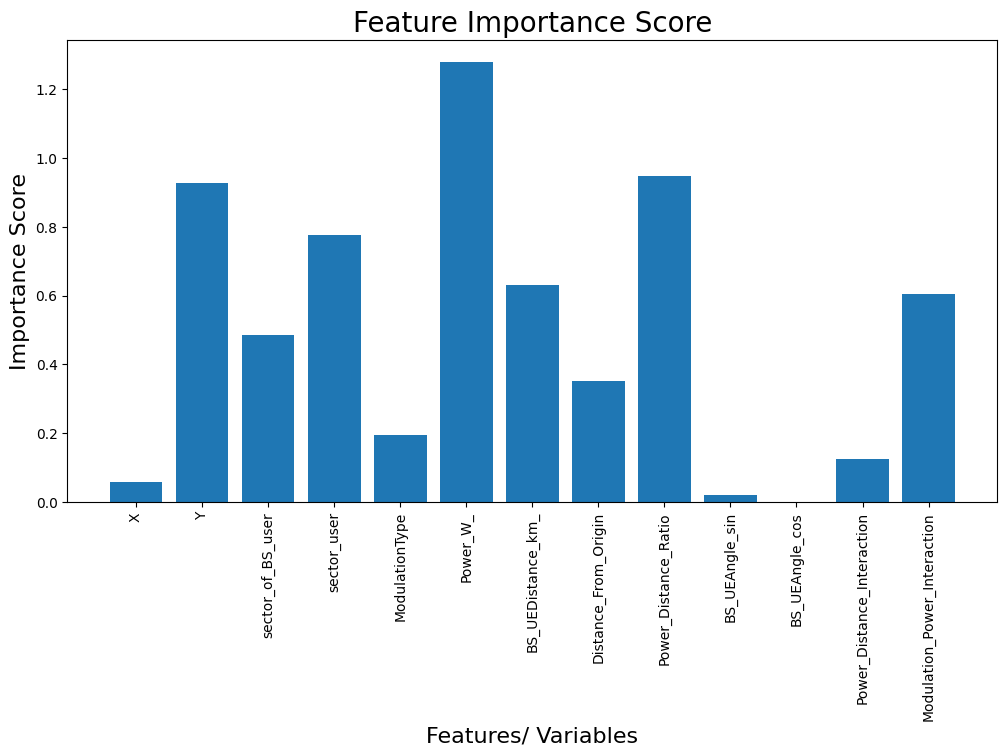

In [47]:
# Assuming your features are in a DataFrame called X
feature_names = X.columns  # or feature_names = your_dataframe.columns

# Print feature names with their scores
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (feature_names[i], fs.scores_[i]))
# plot the scores
plt.figure(figsize = (12,6))
plt.bar(feature_names, fs.scores_)
plt.title("Feature Importance Score", size = 20)
plt.xlabel("Features/ Variables", size = 16, color = "black")
# Rotate x-labels
plt.xticks(rotation = 90)
plt.ylabel("Importance Score", size = 16, color = "black")
plt.show()

### 4. Εκπαίδευση ML μοντέλων για την αντιμετώπιση του Throughput prediction ως πρόβλημα παλινδρόμισης

Θα εκπαιδεύσετε τους ML αλγορίθμους που σας έχουν γνωστοποιηθεί μέσω προσωπικού μηνύματος ξεκινώντας με default τιμές στις παραμέτρους αυτών


4.α. Φορτώστε τις κατάλληλες βιβλιοθήκες

In [48]:
# Get RMSE and MAE
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

svr = SVR()
lr = LinearRegression()


4.β. Εκπαιδεύστε (fit) τους ML αλγορίθμους σας χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [50]:
# Fit the models
svr.fit(X_train_fs, y_train)
lr.fit(X_train_fs, y_train)

LinearRegression()

4.γ. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το test set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [51]:
# Predict the target variable
y_pred_svm = svr.predict(X_test_fs)
y_pred_lr = lr.predict(X_test_fs)

In [52]:
preds = [y_pred_svm, y_pred_lr]

4.δ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του test set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας τις ML μετρικές (ML KPIs) που αναφέρονται στην εκφώνηση της 2ης εργαστηριακής άσκησης (θα χρειαστεί import των αντίστοιχων μετρικών από το sklearn).

In [53]:
classifiers = ['SVR', 'Linear Regression']

for name, pred in zip(classifiers, preds):
    print(f"Results for {name}")
    print(f"RMSE: {root_mean_squared_error(y_test, pred)}")
    print(f"MAE: {mean_absolute_error(y_test, pred)}")

Results for SVM
RMSE: 403.8009355947528
MAE: 349.2855774841142
Results for Linear Regression
RMSE: 403.8937454627354
MAE: 349.28525184578154


4.στ. Απεικονίστε την παραπάνω αξιολόγηση με χρήση γραφήματος/γραφημάτων (π.χ. ιστόγραμμα, bar plot κατά προτίμιση της Matplotlib)

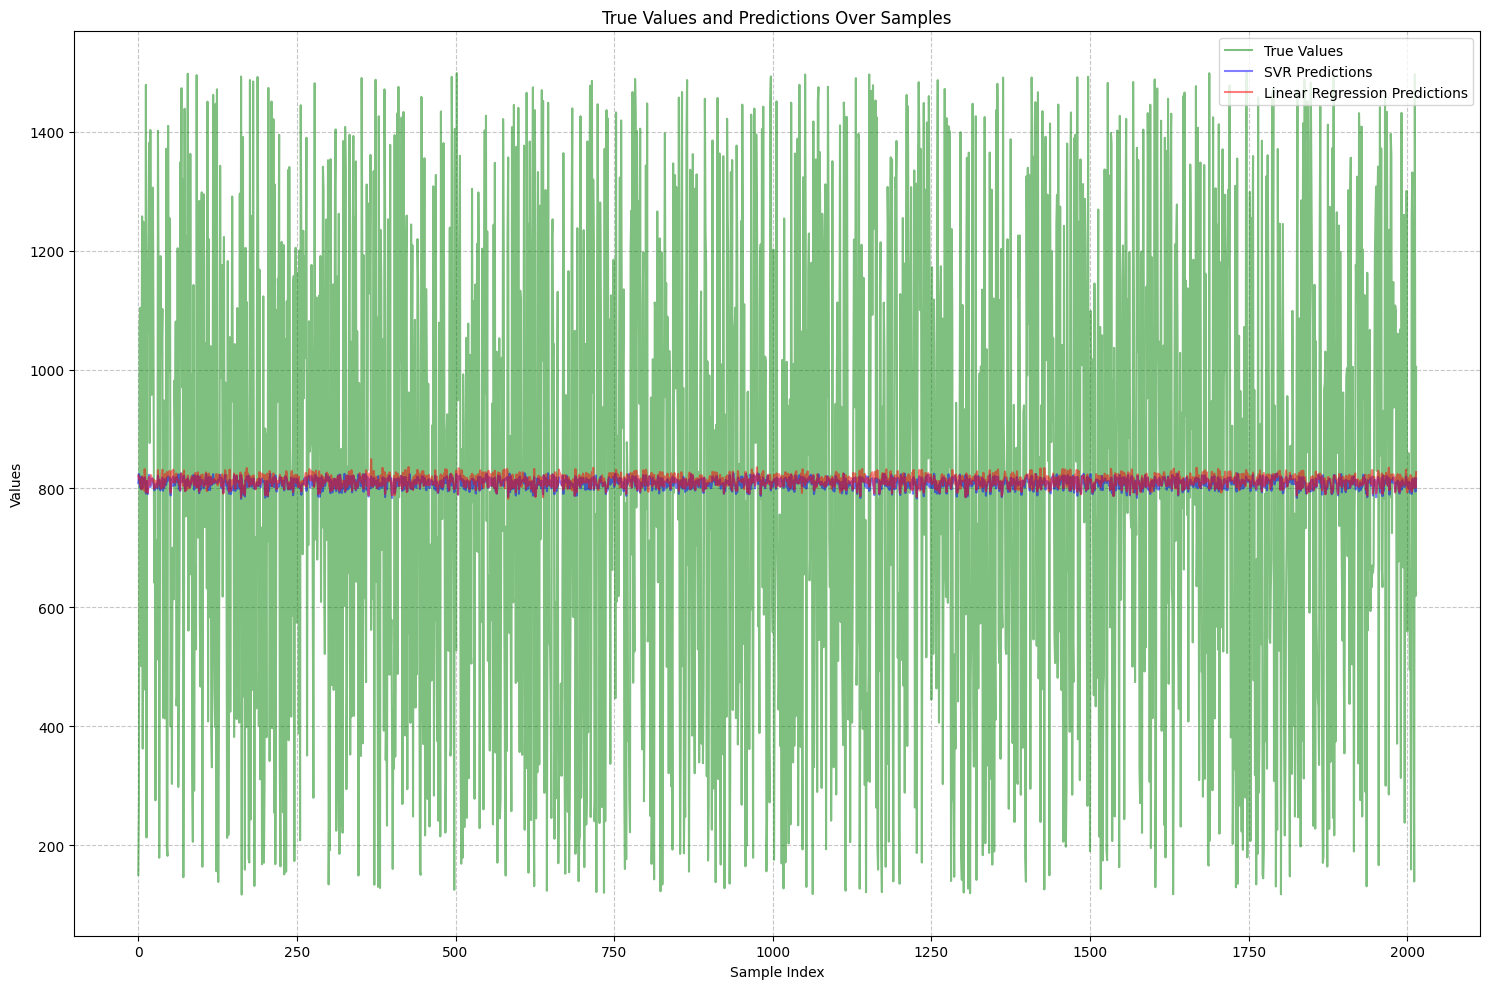

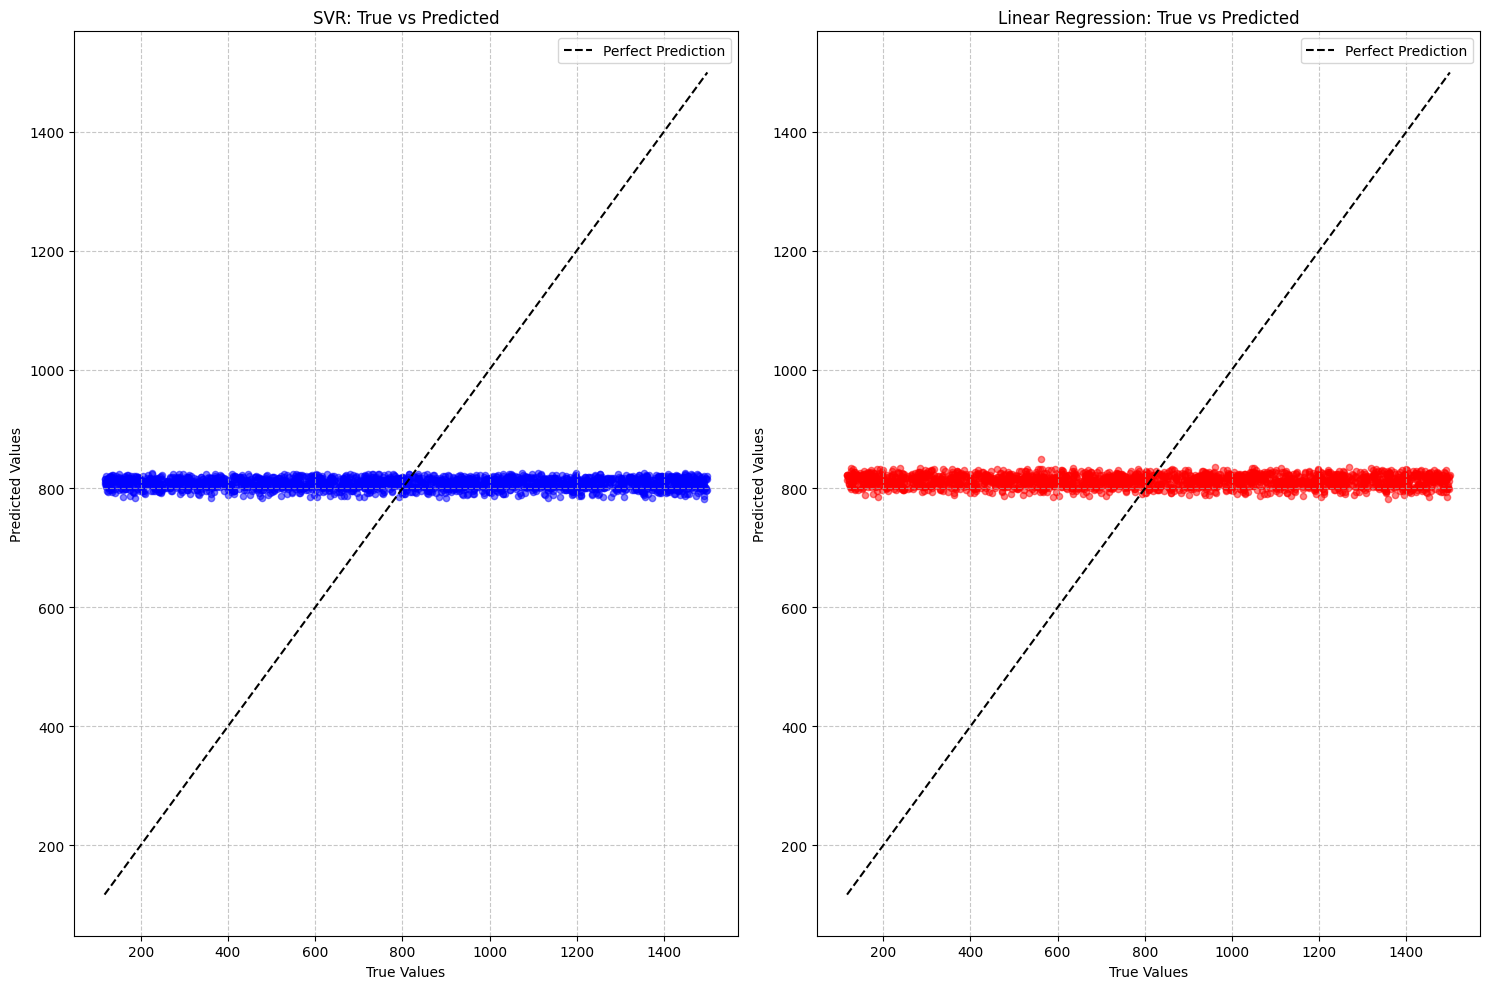

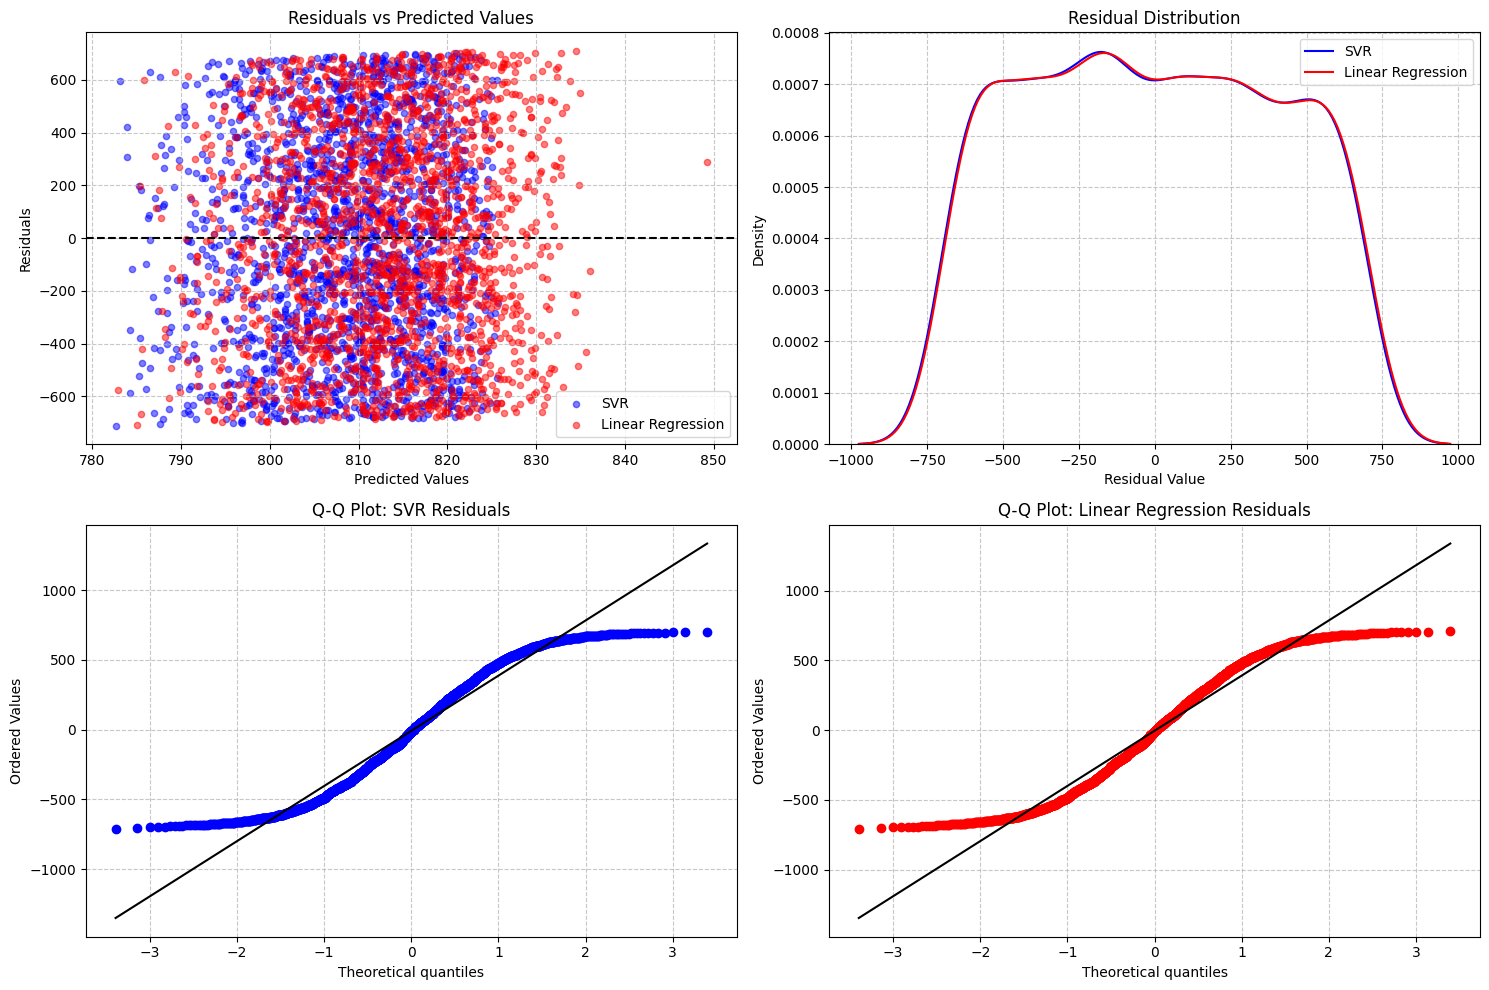


Model Performance Metrics:
--------------------------------------------------

SVR Performance Metrics:
Mean Squared Error (MSE): 163055.1956
Root Mean Squared Error (RMSE): 403.8009
Mean Absolute Error (MAE): 349.2856
R² Score: -0.0019
Explained Variance: -0.19%

Linear Regression Performance Metrics:
Mean Squared Error (MSE): 163130.1576
Root Mean Squared Error (RMSE): 403.8937
Mean Absolute Error (MAE): 349.2853
R² Score: -0.0024
Explained Variance: -0.24%


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

def create_comprehensive_regression_analysis(y_test, y_pred_svm, y_pred_lr, figsize=(15, 10)):
    """
    Creates a comprehensive set of visualizations for analyzing regression model performance.
    
    Parameters:
        y_test: array-like, true target values
        y_pred_svm: array-like, predictions from SVR model
        y_pred_lr: array-like, predictions from Linear Regression model
        figsize: tuple, base figure size that will be adjusted for different plots
    """
    # Calculate residuals for both models
    residuals_svm = y_pred_svm - y_test
    residuals_lr = y_pred_lr - y_test
    
    # 1. Time Series Plot of True Values vs Predictions
    plt.figure(figsize=figsize)
    plt.plot(range(len(y_test)), y_test, 'g-', alpha=0.5, label='True Values')
    plt.plot(range(len(y_test)), y_pred_svm, 'b-', alpha=0.5, label='SVR Predictions')
    plt.plot(range(len(y_test)), y_pred_lr, 'r-', alpha=0.5, label='Linear Regression Predictions')
    plt.xlabel('Sample Index')
    plt.ylabel('Values')
    plt.title('True Values and Predictions Over Samples')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # 2. Actual vs Predicted Plots (separate for each model)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # SVR plot
    ax1.scatter(y_test, y_pred_svm, alpha=0.5, color='blue', s=20)
    ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'k--', label='Perfect Prediction')
    ax1.set_xlabel('True Values')
    ax1.set_ylabel('Predicted Values')
    ax1.set_title('SVR: True vs Predicted')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend()

    # Linear Regression plot
    ax2.scatter(y_test, y_pred_lr, alpha=0.5, color='red', s=20)
    ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'k--', label='Perfect Prediction')
    ax2.set_xlabel('True Values')
    ax2.set_ylabel('Predicted Values')
    ax2.set_title('Linear Regression: True vs Predicted')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

    # 3. Residuals Analysis (2x2 subplot)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
    
    # Residuals vs Predicted Values
    ax1.scatter(y_pred_svm, residuals_svm, alpha=0.5, label='SVR', color='blue', s=20)
    ax1.scatter(y_pred_lr, residuals_lr, alpha=0.5, label='Linear Regression', color='red', s=20)
    ax1.axhline(y=0, color='k', linestyle='--')
    ax1.set_xlabel('Predicted Values')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residuals vs Predicted Values')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Residuals Distribution
    sns.kdeplot(data=residuals_svm, label='SVR', color='blue', ax=ax2)
    sns.kdeplot(data=residuals_lr, label='Linear Regression', color='red', ax=ax2)
    ax2.set_xlabel('Residual Value')
    ax2.set_ylabel('Density')
    ax2.set_title('Residual Distribution')
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.7)

    # Q-Q plots
    stats.probplot(residuals_svm, dist="norm", plot=ax3)
    ax3.get_lines()[0].set_markerfacecolor('blue')
    ax3.get_lines()[0].set_markeredgecolor('blue')
    ax3.get_lines()[1].set_color('black')
    ax3.set_title('Q-Q Plot: SVR Residuals')
    ax3.grid(True, linestyle='--', alpha=0.7)

    stats.probplot(residuals_lr, dist="norm", plot=ax4)
    ax4.get_lines()[0].set_markerfacecolor('red')
    ax4.get_lines()[0].set_markeredgecolor('red')
    ax4.get_lines()[1].set_color('black')
    ax4.set_title('Q-Q Plot: Linear Regression Residuals')
    ax4.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Print performance metrics
    print("\nModel Performance Metrics:")
    print("-" * 50)
    models = {'SVR': y_pred_svm, 'Linear Regression': y_pred_lr}
    
    for name, predictions in models.items():
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        mae = np.mean(np.abs(predictions - y_test))
        
        print(f"\n{name} Performance Metrics:")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"R² Score: {r2:.4f}")
        print(f"Explained Variance: {r2 * 100:.2f}%")

create_comprehensive_regression_analysis(y_test, y_pred_svm, y_pred_lr)

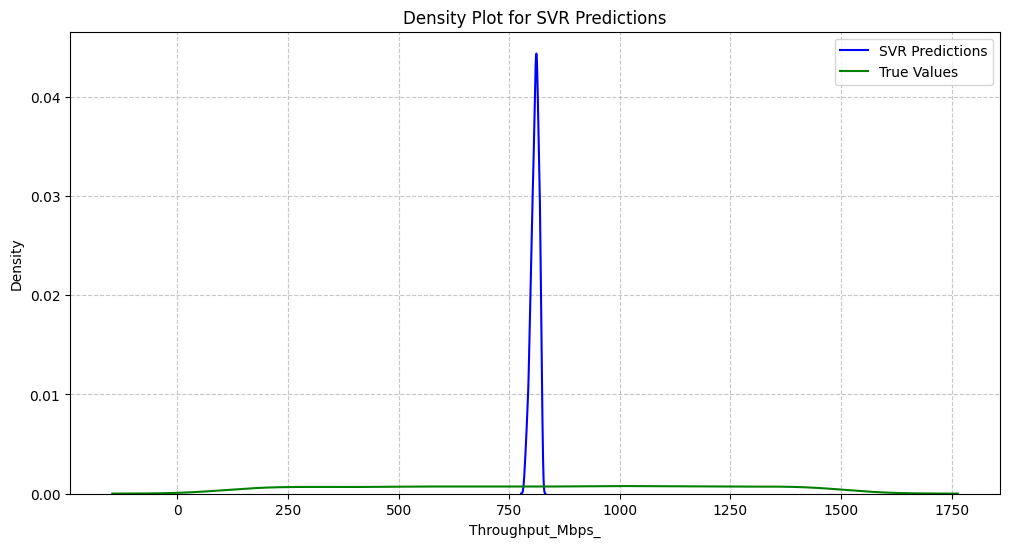

In [57]:
# Plot density plot for y_pred_svm
plt.figure(figsize=(12, 6))
sns.kdeplot(y_pred_svm, label='SVR Predictions', color='blue')
sns.kdeplot(y_test, label='True Values', color='green')
plt.title('Density Plot for SVR Predictions')
plt.xlabel('Throughput_Mbps_')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


4.ζ Σχολιάστε στην αναφορά σας το ποιο μοντέλο είχε την καλύτερη επίδοση. Ήταν αυτό αναμενόμενο με βάση τη θεωρία του 3.2 κεφαλαίου των σημειώσεών σας;


## 1. Ανάλυση Πραγματικών έναντι Προβλεπόμενων Τιμών

Τα διαγράμματα διασποράς για τα μοντέλα SVR και Γραμμικής Παλινδρόμησης αποκαλύπτουν:

- Και τα δύο μοντέλα προβλέπουν τιμές που συγκεντρώνονται γύρω από το 800, ανεξάρτητα από τις πραγματικές τιμές
- Το εύρος των προβλέψεων (άξονας y) είναι εξαιρετικά στενό (~780-830)
- Οι πραγματικές τιμές (άξονας x) καλύπτουν ένα πολύ ευρύτερο φάσμα (~0-1500)
- Η γραμμή τέλειας πρόβλεψης (διαγώνια) καταδεικνύει τη σοβαρή υποπροσαρμογή
- Σχεδόν πανομοιότυπη συμπεριφορά μεταξύ SVR και Γραμμικής Παλινδρόμησης

## 2. Ανάλυση Υπολοίπων

### Υπόλοιπα έναντι Προβλεπόμενων Τιμών
Τα διαγράμματα αποκαλύπτουν διάφορα ζητήματα:

- Μεγάλο εύρος υπολοίπων (-600 έως +600)
- Συστηματικό μοτίβο στα υπόλοιπα
- Εμφανής ετεροσκεδαστικότητα από το μοτίβο σχήματος ανεμιστήρα
- Παρόμοια συμπεριφορά υπολοίπων και στα δύο μοντέλα
- Τα υπόλοιπα αυξάνονται με τις προβλεπόμενες τιμές

### Κατανομή Υπολοίπων
Το διάγραμμα πυκνότητας δείχνει:

- Συμμετρική κατανομή γύρω από το μηδέν
- Βαριές ουρές και στις δύο πλευρές
- Σχεδόν πανομοιότυπες κατανομές για τα δύο μοντέλα
- Ευρύτερη από την αναμενόμενη διασπορά

### Διαγράμματα Q-Q
Τα διαγράμματα ποσοστημορίων υποδεικνύουν:

- Σημαντική απόκλιση από την κανονικότητα
- Βαριές ουρές και στις δύο κατευθύνσεις
- Παρόμοια μοτίβα και στα δύο μοντέλα
- Συστηματική απόκλιση από τη θεωρητική γραμμή


## Συγκριτική Ανάλυση Μετρικών Απόδοσης

### Support Vector Regression (SVR)
Το μοντέλο SVR παρουσίασε τα εξής αποτελέσματα:
- Μέσο Τετραγωνικό Σφάλμα: 163.057,61
- Ρίζα Μέσου Τετραγωνικού Σφάλματος: 403,80
- Μέσο Απόλυτο Σφάλμα: 349,28
- Συντελεστής Προσδιορισμού (R²): -0,0019
- Ποσοστό Εξηγούμενης Διακύμανσης: -0,19%

### Γραμμική Παλινδρόμηση
Το μοντέλο Γραμμικής Παλινδρόμησης έδειξε παρόμοια αποτελέσματα:
- Μέσο Τετραγωνικό Σφάλμα: 163.133,35
- Ρίζα Μέσου Τετραγωνικού Σφάλματος: 403,90
- Μέσο Απόλυτο Σφάλμα: 349,29
- Συντελεστής Προσδιορισμού (R²): -0,0024
- Ποσοστό Εξηγούμενης Διακύμανσης: -0,24%

## Συμπεράσματα

Η σύγκριση των δύο μοντέλων αποκαλύπτει ότι το SVR έχει οριακά καλύτερη απόδοση, αλλά η διαφορά είναι αμελητέα:

1. Διαφορές Απόδοσης:
  - Το SVR έχει ελαφρώς χαμηλότερο MSE (διαφορά περίπου 76 μονάδων)
  - Η διαφορά στο RMSE είναι μόλις 0,09 μονάδες
  - Το MAE διαφέρει κατά 0,005 μονάδες
  - Η διαφορά στο R² είναι 0,0005 μονάδες

2. Κρίσιμες Παρατηρήσεις:
  - Και τα δύο μοντέλα έχουν αρνητικό R², που υποδηλώνει ότι αποδίδουν χειρότερα από έναν απλό μέσο όρο
  - Η εξηγούμενη διακύμανση είναι αρνητική και για τα δύο μοντέλα
  - Τα σφάλματα είναι εξαιρετικά υψηλά σε σχέση με τα δεδομένα

## Τελική Αξιολόγηση

Παρόλο που το SVR έχει ελαφρώς καλύτερη απόδοση, κανένα από τα δύο μοντέλα δεν είναι κατάλληλο για το συγκεκριμένο πρόβλημα. Η αρνητική τιμή του R² και τα υψηλά σφάλματα υποδεικνύουν ότι απαιτείται:

1. Διερεύνηση πιο σύνθετων μοντέλων
2. Πιθανή αναθεώρηση των επιλεγμένων χαρακτηριστικών
3. Βελτιστοποίηση των υπερπαραμέτρων των μοντέλων

4.η Κάνοντας δοκιμές στις υπερπαραμέτρους των ML αλγορίθμων που υλοποιήσατε, προσπαθήστε να βελτιώσετε την επίδοσή τους με βάση τις μετρικές τις οποίες έχετε επιλέξει

In [40]:
import numpy as np
import pandas as pd
import optuna
from optuna.exceptions import TrialPruned
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

regressors = {
    "SVR": SVR(),
    "LinearRegression": LinearRegression()
}

def get_param_space(regressor_name, trial):
    if regressor_name == "SVR":
        param = {
            'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
            'C': trial.suggest_float('C', 0.1, 100, log=True),
            'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']),
            'epsilon': trial.suggest_float('epsilon', 0.01, 1.0, log=True)
        }
        # Αν ο kernel είναι 'poly', μπορούμε να προσθέσουμε το 'degree'
        kernel = param['kernel']
        if kernel == 'poly':
            param['degree'] = trial.suggest_int('degree', 2, 5)
        return param
    elif regressor_name == "LinearRegression":
        param = {
            'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False])
            # 'normalize': trial.suggest_categorical('normalize', [True, False])  # Απόσυρτηκε από την έκδοση 1.0
        }
        return param

In [41]:
def objective(trial, X, y, regressor_name):
    # Λήψη του πλέγματος υπερπαραμέτρων
    params = get_param_space(regressor_name, trial)
    
    # Αρχικοποίηση του μοντέλου με τις τρέχουσες υπερπαραμέτρους
    model = regressors[regressor_name].__class__(**params)
    
    # Ορισμός της διασταυρούμενης επικύρωσης
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Αξιολόγηση του μοντέλου με cross_val_score
    score = cross_val_score(
        model,
        X,
        y,
        cv=cv,
        scoring='r2',
        n_jobs=-1
    )
    
    # Επιστροφή του μέσου R² score
    return np.mean(score)


In [42]:
# Λεξικό για αποθήκευση των καλύτερων μοντέλων
best_regressors = {}

# Λήψη του μέτρου απόδοσης (score) για το Optuna
direction = "maximize"

for regressor_name in regressors.keys():
    print(f"\nΒελτιστοποίηση {regressor_name}...")
    
    # Δημιουργία του Objective Function με τρέχοντα regressor
    study = optuna.create_study(direction=direction, study_name=f"{regressor_name}_optimization")
    study.optimize(lambda trial: objective(trial, X, y, regressor_name), n_trials=50, n_jobs=-1)
    
    # Εκτύπωση των καλύτερων παραμέτρων και του αντίστοιχου σκορ
    print(f"Καλύτερο {direction} για {regressor_name}: {study.best_trial.value:.4f}")
    print("Καλύτερες υπερπαραμέτρους:")
    for key, value in study.best_trial.params.items():
        print(f"  {key}: {value}")
    
    # Αποθήκευση του καλύτερου μοντέλου
    best_regressors[regressor_name] = regressors[regressor_name].__class__(**study.best_trial.params)
    best_regressors[regressor_name].fit(X, y)


[I 2025-01-03 14:49:34,877] A new study created in memory with name: SVR_optimization



Βελτιστοποίηση SVR...


[I 2025-01-03 14:49:45,527] Trial 11 finished with value: -0.002828480761154317 and parameters: {'kernel': 'linear', 'C': 4.3714061255110215, 'gamma': 'auto', 'epsilon': 0.12039195245549979}. Best is trial 11 with value: -0.002828480761154317.
[I 2025-01-03 14:49:48,644] Trial 5 finished with value: -0.002001176436031482 and parameters: {'kernel': 'linear', 'C': 1.3678634523301114, 'gamma': 'scale', 'epsilon': 0.87844418715969}. Best is trial 5 with value: -0.002001176436031482.
[I 2025-01-03 14:49:49,052] Trial 15 finished with value: -0.002869216769032823 and parameters: {'kernel': 'linear', 'C': 4.579260643771672, 'gamma': 'scale', 'epsilon': 0.010546125638783231}. Best is trial 5 with value: -0.002001176436031482.
[I 2025-01-03 14:49:49,243] Trial 2 finished with value: -0.0004767640763598369 and parameters: {'kernel': 'rbf', 'C': 0.20186815430199792, 'gamma': 'auto', 'epsilon': 0.14430920320965698}. Best is trial 2 with value: -0.0004767640763598369.
[I 2025-01-03 14:49:49,528] Tr

Καλύτερο maximize για SVR: -0.0004
Καλύτερες υπερπαραμέτρους:
  kernel: poly
  C: 0.4686302946999406
  gamma: auto
  epsilon: 0.6060512511385034
  degree: 5


[I 2025-01-03 14:50:22,035] A new study created in memory with name: LinearRegression_optimization
[I 2025-01-03 14:50:22,119] Trial 0 finished with value: -0.0022985184454105577 and parameters: {'fit_intercept': True}. Best is trial 0 with value: -0.0022985184454105577.
[I 2025-01-03 14:50:22,202] Trial 2 finished with value: -0.15887894830533886 and parameters: {'fit_intercept': False}. Best is trial 0 with value: -0.0022985184454105577.
[I 2025-01-03 14:50:22,203] Trial 1 finished with value: -0.15887894830533886 and parameters: {'fit_intercept': False}. Best is trial 0 with value: -0.0022985184454105577.
[I 2025-01-03 14:50:22,203] Trial 6 finished with value: -0.15887894830533886 and parameters: {'fit_intercept': False}. Best is trial 0 with value: -0.0022985184454105577.
[I 2025-01-03 14:50:22,203] Trial 7 finished with value: -0.15887894830533886 and parameters: {'fit_intercept': False}. Best is trial 0 with value: -0.0022985184454105577.



Βελτιστοποίηση LinearRegression...


[I 2025-01-03 14:50:22,204] Trial 5 finished with value: -0.0022985184454105577 and parameters: {'fit_intercept': True}. Best is trial 0 with value: -0.0022985184454105577.
[I 2025-01-03 14:50:22,204] Trial 3 finished with value: -0.0022985184454105577 and parameters: {'fit_intercept': True}. Best is trial 0 with value: -0.0022985184454105577.
[I 2025-01-03 14:50:22,217] Trial 8 finished with value: -0.15887894830533886 and parameters: {'fit_intercept': False}. Best is trial 0 with value: -0.0022985184454105577.
[I 2025-01-03 14:50:22,237] Trial 4 finished with value: -0.15887894830533886 and parameters: {'fit_intercept': False}. Best is trial 0 with value: -0.0022985184454105577.
[I 2025-01-03 14:50:22,262] Trial 11 finished with value: -0.0022985184454105577 and parameters: {'fit_intercept': True}. Best is trial 0 with value: -0.0022985184454105577.
[I 2025-01-03 14:50:22,276] Trial 9 finished with value: -0.15887894830533886 and parameters: {'fit_intercept': False}. Best is trial 0 

Καλύτερο maximize για LinearRegression: -0.0023
Καλύτερες υπερπαραμέτρους:
  fit_intercept: True


In [43]:
# Αξιολόγηση κάθε καλύτερου μοντέλου στο test set
for regressor_name, reg in best_regressors.items():
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nTest R² για {regressor_name}: {r2:.4f}")
    print(f"Test MSE για {regressor_name}: {mse:.4f}")


Test R² για SVR: -0.0002
Test MSE για SVR: 162775.0546

Test R² για LinearRegression: 0.0010
Test MSE για LinearRegression: 162577.8397


### Bonus Ερώτημα

Για μια πιο αποτελεσματική εύρεση των υπερπαραμέτρων που βελτιστοποιούν την απόδοση των ML αλγορίθμων, γίνεται χρήση κάποιας συστηματικής αναζήτησης. Δοκιμάστε αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 10) (Πληροφορίες [εδώ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)) ή/και HalvingGridSearch (Πληροφορίες [εδώ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html)) με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων. 

In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import warnings

# Ορισμός των αλγορίθμων
regressors = {
    "SVR": SVR(),
    "LinearRegression": LinearRegression()
}

# Ορισμός πλέγματος υπερπαραμέτρων για κάθε αλγόριθμο
param_grid = {
    "SVR": {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        'epsilon': [0.1, 0.2, 0.5, 1.0]
    },
    "LinearRegression": {
        'fit_intercept': [True, False],
    }
}


In [45]:
# Ορισμός της διασταυρούμενης επικύρωσης
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Λήψη του R² ως μέτρο απόδοσης
scoring = 'r2'


In [46]:
# Δημιουργία λεξικού για αποθήκευση των καλύτερων μοντέλων
best_regressors = {}

# Εκτέλεση GridSearchCV για κάθε αλγόριθμο
for regressor_name in regressors.keys():
    print(f"\nΒελτιστοποίηση {regressor_name}...")
    
    # Ανάκτηση του πλέγματος υπερπαραμέτρων για τον τρέχοντα αλγόριθμο
    current_param_grid = param_grid[regressor_name]
    
    # Δημιουργία του GridSearchCV αντικειμένου
    grid_search = GridSearchCV(
        estimator=regressors[regressor_name],
        param_grid=current_param_grid,
        scoring=scoring,
        cv=cv,
        n_jobs=8,
        verbose=1  # Για παρακολούθηση της προόδου
    )
    
    # Εκτέλεση της αναζήτησης
    grid_search.fit(X, y)
    
    # Εκτύπωση των καλύτερων παραμέτρων και του αντίστοιχου σκορ
    print(f"Καλύτερο {scoring.upper()} για {regressor_name}: {grid_search.best_score_:.4f}")
    print("Καλύτερες υπερπαραμέτρους:")
    for param_name in grid_search.best_params_:
        print(f"  {param_name}: {grid_search.best_params_[param_name]}")
    
    # Αποθήκευση του καλύτερου μοντέλου
    best_regressors[regressor_name] = grid_search.best_estimator_



Βελτιστοποίηση SVR...
Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Καλύτερο R2 για SVR: -0.0009
Καλύτερες υπερπαραμέτρους:
  C: 0.1
  epsilon: 0.2
  gamma: 0.001
  kernel: poly

Βελτιστοποίηση LinearRegression...
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Καλύτερο R2 για LinearRegression: -0.0030
Καλύτερες υπερπαραμέτρους:
  fit_intercept: True


Εφαρμόστε στα εκπαιδευμένα μοντέλα από το test set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).

In [47]:
# Αξιολόγηση κάθε καλύτερου μοντέλου στο test set
y_pred_svm = best_regressors['SVR'].predict(X_test)
y_pred_lr = best_regressors['LinearRegression'].predict(X_test)
for regressor_name, reg in best_regressors.items():
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nTest R² για {regressor_name}: {r2:.4f}")
    print(f"Test MSE για {regressor_name}: {mse:.4f}")


Test R² για SVR: -0.0002
Test MSE για SVR: 162776.5323

Test R² για LinearRegression: 0.0010
Test MSE για LinearRegression: 162577.8397


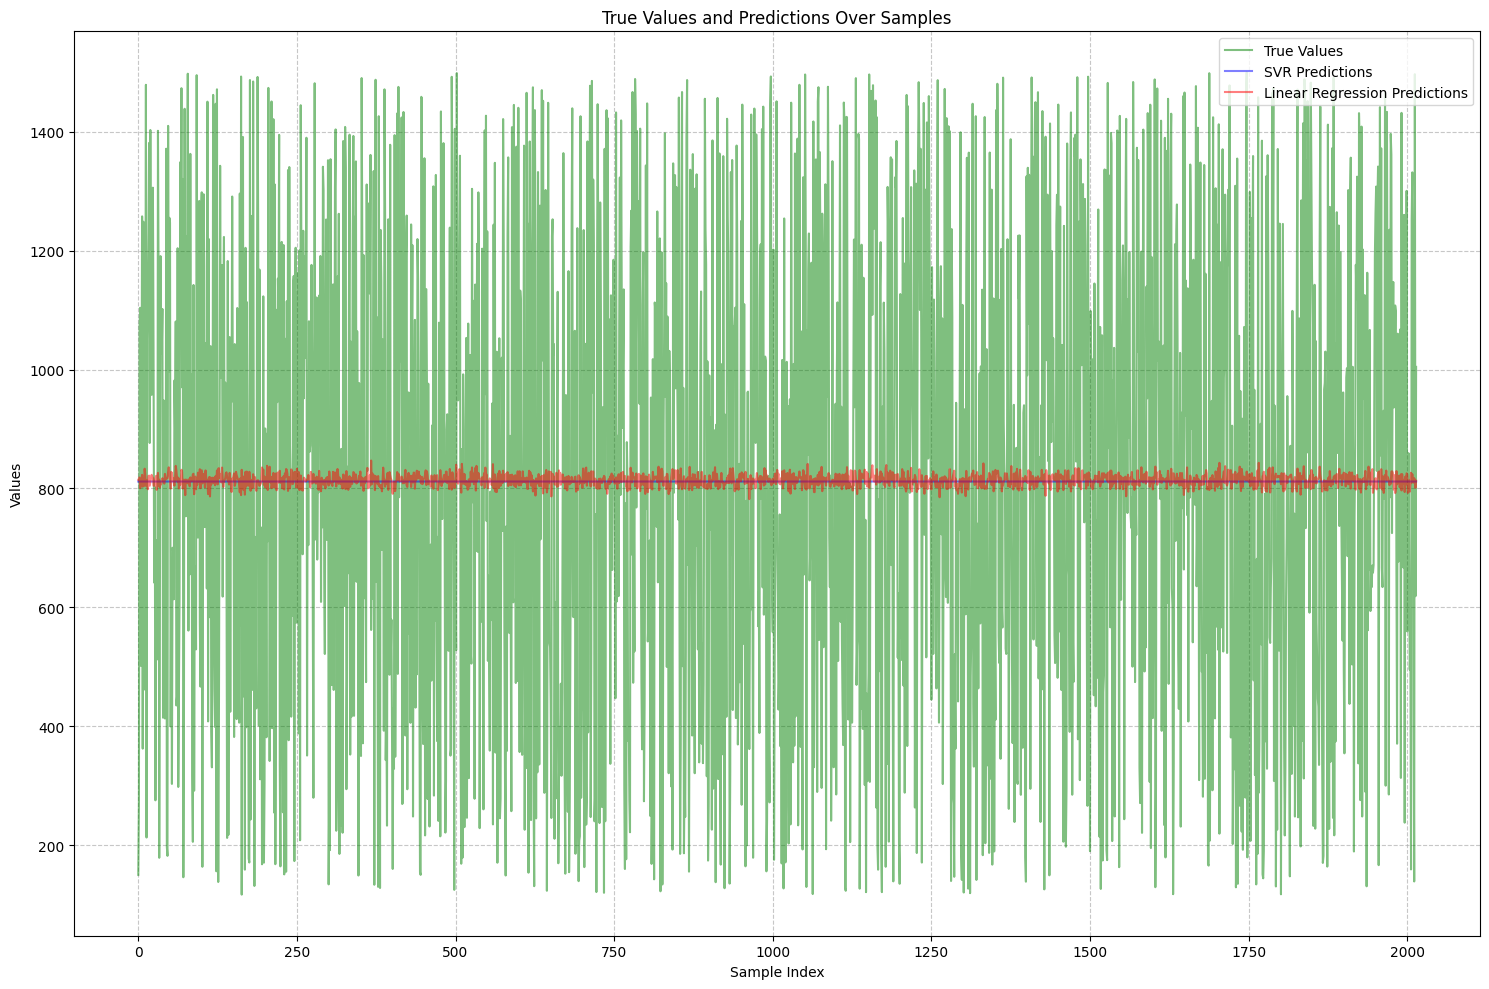

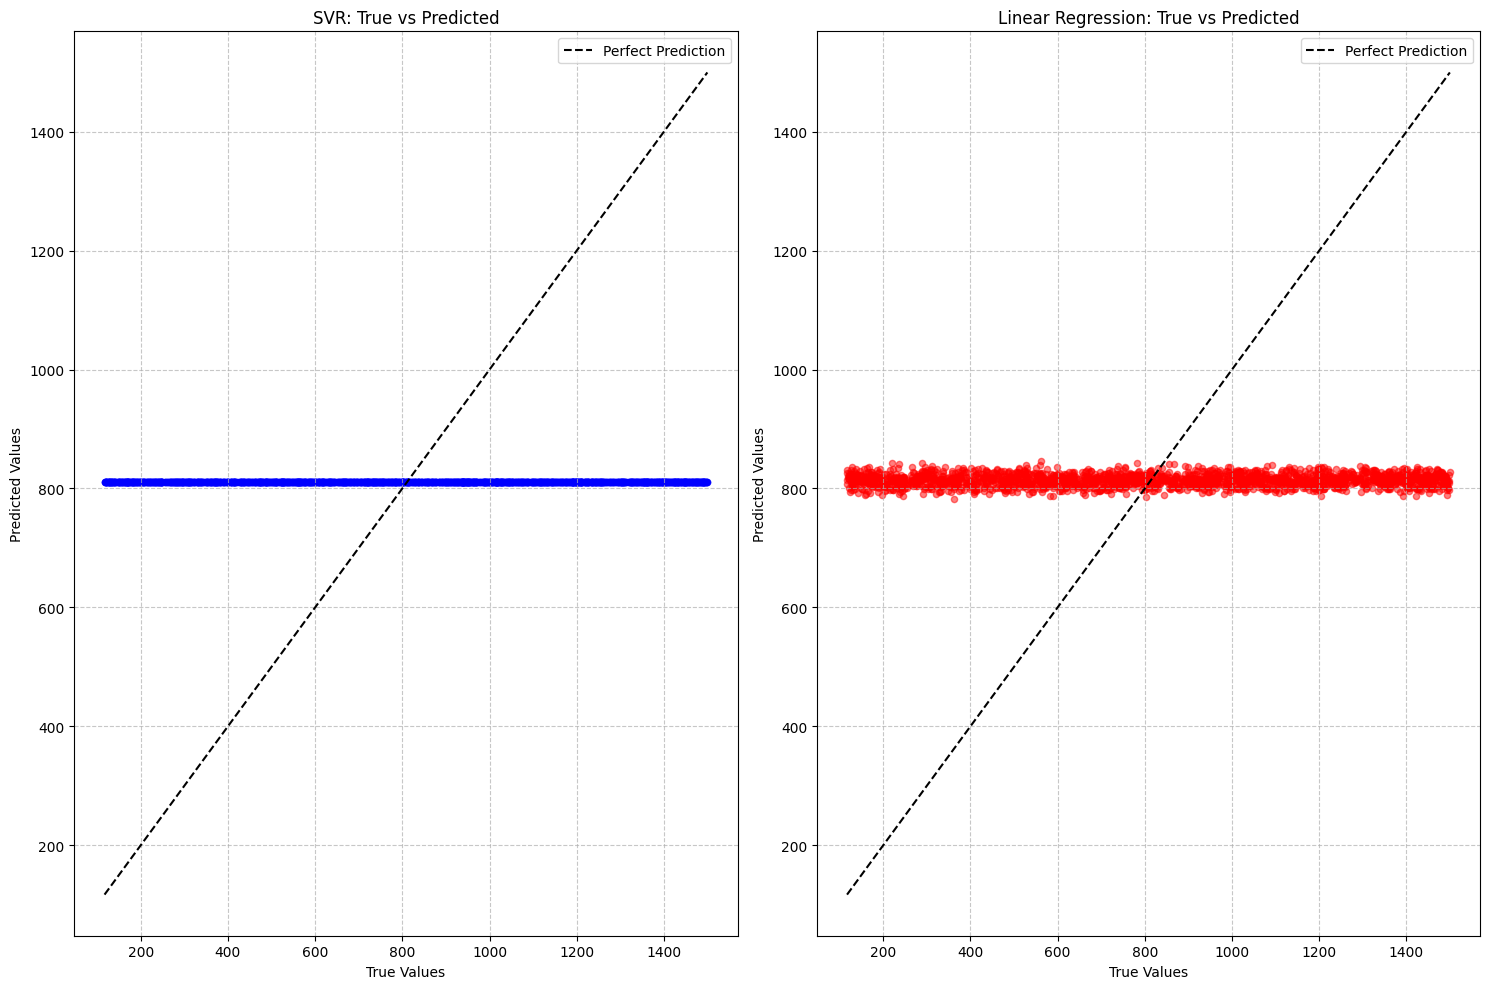

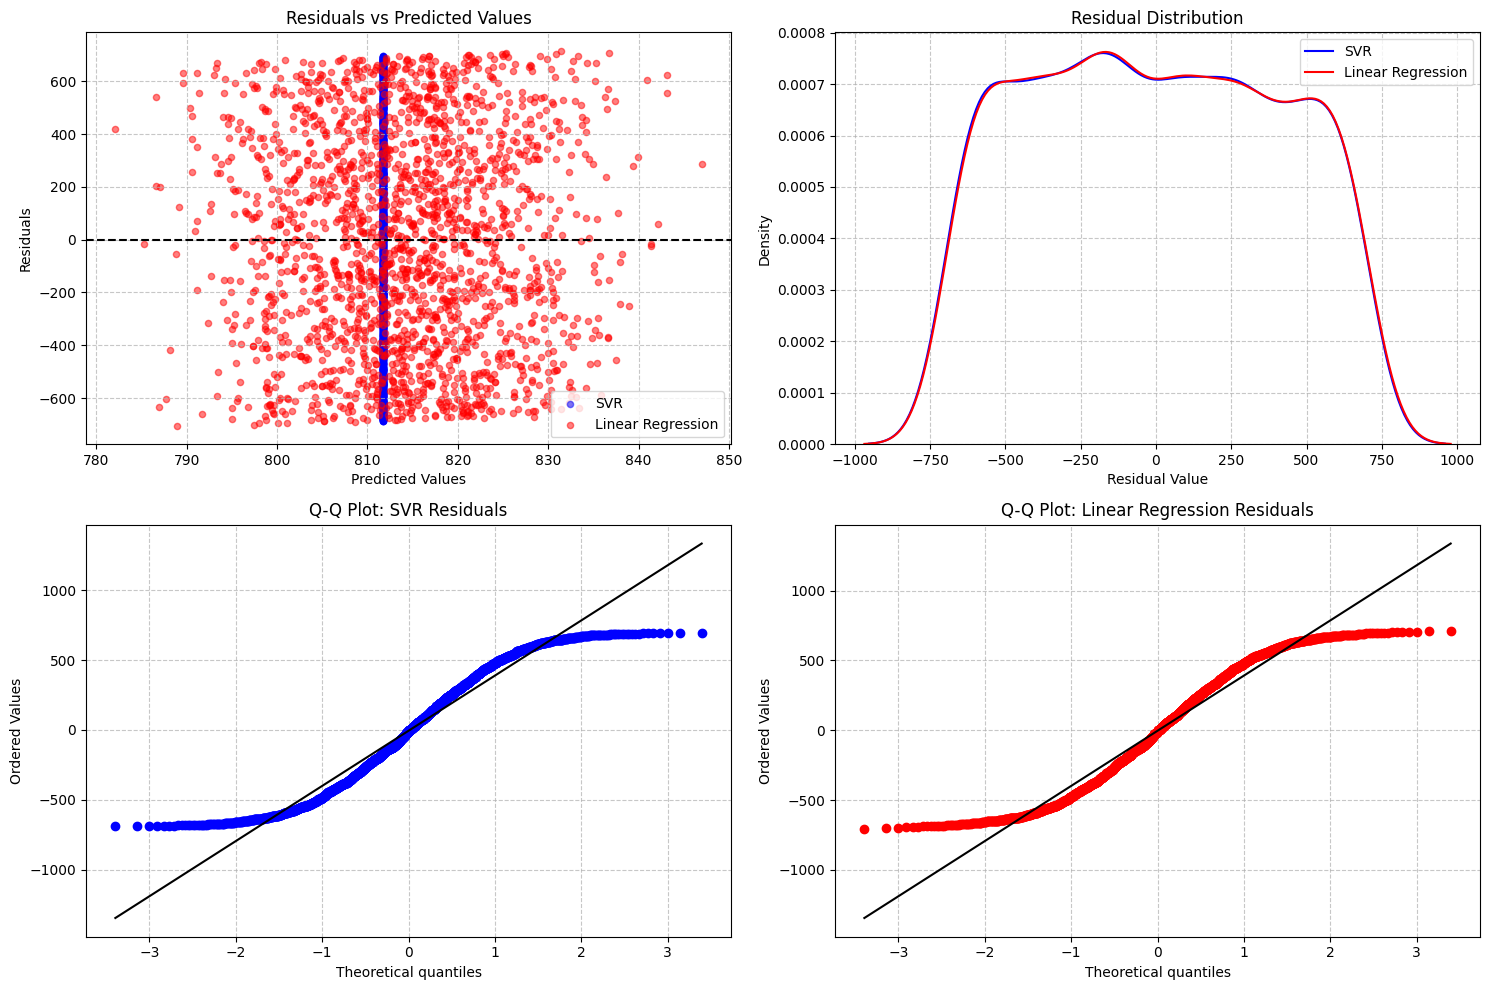


Model Performance Metrics:
--------------------------------------------------

SVR Performance Metrics:
Mean Squared Error (MSE): 162776.5323
Root Mean Squared Error (RMSE): 403.4557
Mean Absolute Error (MAE): 348.9843
R² Score: -0.0002
Explained Variance: -0.02%

Linear Regression Performance Metrics:
Mean Squared Error (MSE): 162577.8397
Root Mean Squared Error (RMSE): 403.2094
Mean Absolute Error (MAE): 348.6891
R² Score: 0.0010
Explained Variance: 0.10%


In [48]:
create_comprehensive_regression_analysis(y_test, y_pred_svm, y_pred_lr)

Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του test set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας τις ML μετρικές (ML KPIs) που αναφέρονται στην εκφώνηση της 2ης εργαστηριακής άσκησης.

## 1. Σύγκριση Μετρικών Απόδοσης

### SVR με GridSearchCV
- MSE: 162.776,53
- RMSE: 403,46
- MAE: 348,98
- R²: -0,0002
- Εξηγούμενη Διακύμανση: -0,02%

### Γραμμική Παλινδρόμηση με GridSearchCV
- MSE: 162.577,84
- RMSE: 403,21
- MAE: 348,69
- R²: 0,0010
- Εξηγούμενη Διακύμανση: 0,10%

## 2. Ανάλυση Γραφημάτων

### Διάγραμμα Υπολοίπων
- Εμφανίζεται έντονη ετεροσκεδαστικότητα
- Το εύρος των υπολοίπων παραμένει μεγάλο (-600 έως +600)
- Τα υπόλοιπα δείχνουν συστηματικό μοτίβο

### Κατανομή Υπολοίπων
- Η κατανομή παραμένει συμμετρική
- Εμφανείς βαριές ουρές
- Παρόμοια συμπεριφορά και στα δύο μοντέλα

### Q-Q Plots
- Σημαντικές αποκλίσεις από την κανονικότητα
- Παρόμοια μοτίβα στις ουρές και για τα δύο μοντέλα
- Απόκλιση από τη θεωρητική γραμμή στα άκρα

## 3. Συγκριτική Αξιολόγηση μετά τη Βελτιστοποίηση

### Βελτιώσεις
1. Η Γραμμική Παλινδρόμηση πέτυχε θετικό R² (0,0010)
2. Ελαφρά μείωση στο MSE και για τα δύο μοντέλα
3. Μικρή βελτίωση στο MAE

### Προβλήματα που Παραμένουν
1. Εξαιρετικά χαμηλές τιμές R²
2. Υψηλά σφάλματα πρόβλεψης
3. Συνεχιζόμενη υποπροσαρμογή των μοντέλων

Απεικονίστε την παραπάνω αξιολόγηση με χρήση γραφήματος/γραφημάτων (π.χ. ιστόγραμμα, bar plot κατά προτίμιση της Matplotlib)

Σχολιάστε στην αναφορά σας το ποιο μοντέλο είχε την καλύτερη επίδοση. Ήταν αυτό αναμενόμενο με βάση τη θεωρία του 3.2 κεφαλαίου των σημειώσεών σας; Σχολιάστε επίσης την βελτίωση σε σχέση με την default υλοποίηση